In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))

from src.visualization import (
    plot_continuous_distribution, 
    plot_categorical_ratio, 
    plot_outlier_analysis,
    plot_violin_sodium,
    plot_correlation_heatmap
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Distribution of survival (0)             VS               death (1)')

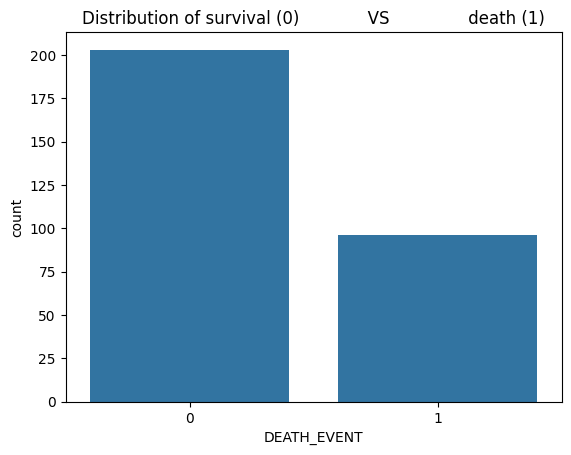

In [2]:
df = pd.read_csv('../data/raw/heart_failure_clinical_records_dataset.csv')

sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Distribution of survival (0)             VS               death (1)')


In [3]:
summary = df.describe().T 
display(summary)

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


if we look at the describtion of Creatinine Phosphokinase (CPK), Median is only 250 while The Mean is 581(more than double of mean), which indicates a massive right skew.
The mean of DEATH_EVENT is 0.321 meaning that Roughly 32% of the dataset experienced a mortality event. Although the classes are imbalanced, the degree of imbalance is acceptable for effective machine learning modeling.

#1. Based on some medical researches, The most important factors are : age, ejection fraction and serum creatine

I will use a Kernel Density Estimate (KDE) to visualize these distributions in order to compare their shapes fairly, since the number of survivors and deaths is different. In our dataset, as we saw from the previous survivor count, survivors are approximately twice as many as the Dead.

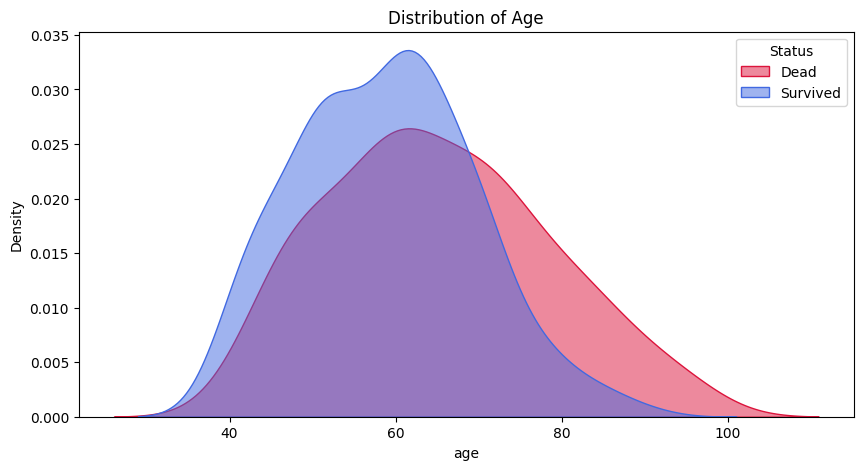

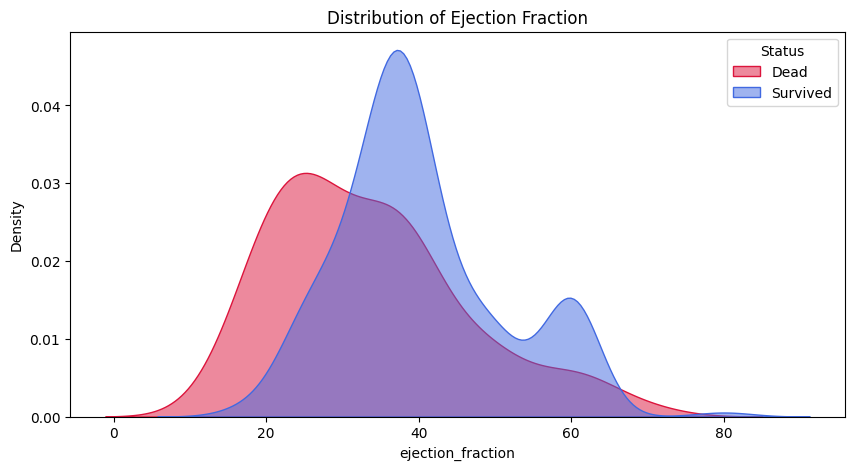

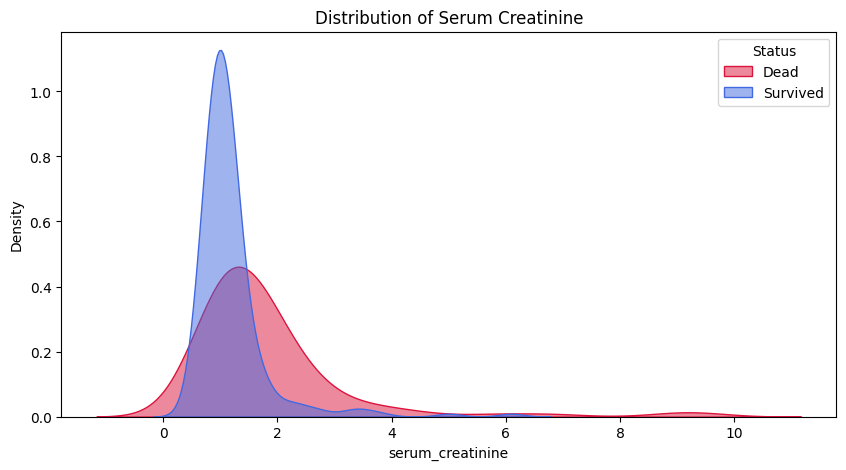

In [4]:
# 1. age, ejection fraction and serum creatine

for col in ['age', 'ejection_fraction', 'serum_creatinine']:
    plot_continuous_distribution(df, col)




age distribution:
on this KDE plot, we can definetely see the "Distribution shift", which means, based on the dataset,  older patients have a higher probability of the death event.
The "Dead" distribution is stochastically larger than the "Survivors" distribution.
"Survivors" distributions are more normally distributed, while "Dead" distribution has high mean and high variance.

ejection fraction distribution: visualization shows that patients who had low ejection fraction level (below 30%) most likely to be dead. Curve of  "Dead" distribution peaks at approximately 25%. "Survivors" distribution has bimodal nature, it has a huge peak at around 40% (which means early heart failure, but stable), and second much smaller peak at around 60% (that means healthy). Based on this visualization, we can see "critical threshold" at approximately 35%.
below that, density of red curve which is "Dead" distribution, is much higher than blue curve of "Survivors" distribution. That means 35% of ejection fraction is mathematically significant cutoff for survival prediction.

Serum creatinine: 
Based on the visualization, "Survivors" distribution has low variance, is super narrow and peaked at approximately 1. 
However, "Dead" distribution has higher variance, long tail on right, heavily right skewed, tail  even reaches 6.0 and more on scale. That means that even small increase of serum creatinine can be a reason for a death event to occur.



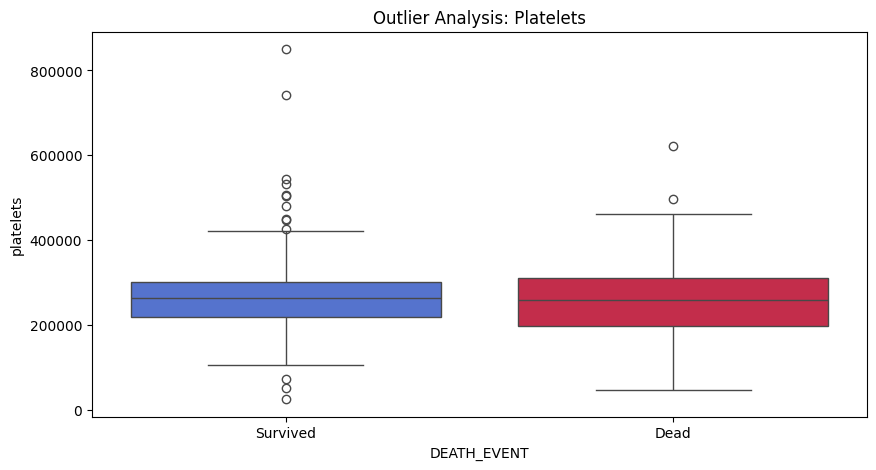

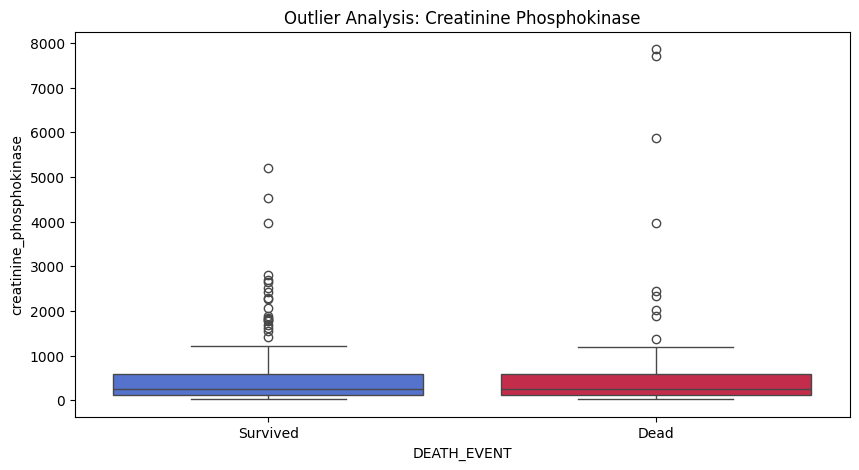

In [5]:
#2.  The messy variables
for col in ['platelets', 'creatinine_phosphokinase']:
    plot_outlier_analysis(df, col)

platelets:
Based on the boxplot showing how platelet concentration in blood relates to fatal heart disease, the median values for the “Survival” and “Dead” groups are almost the same. Additionally, the heights of the boxes are very close to each other, which can be considered essentially identical. This suggests that platelet concentration does not have a strong effect on mortality due to heart disease in this dataset.
We also observe many data points above 400,000, which cannot be considered noise and removed, since this is medical data. Such high platelet counts are indicators of thrombocytosis, which increases the risk of blood clots and can be dangerous for heart stability.

creatine phosphokinase:
The same pattern is observed here. The medians and box heights are almost identical, indicating that creatine phosphokinase does not play a significant role in heart disease mortality in this dataset. Both boxplots are concentrated near zero, meaning that most patients have low creatine phosphokinase levels and the distribution is highly skewed.
However, we also observe several extreme values (especially among survived patients) that can reach up to 6000. Some dead patients also had higher than 6000.

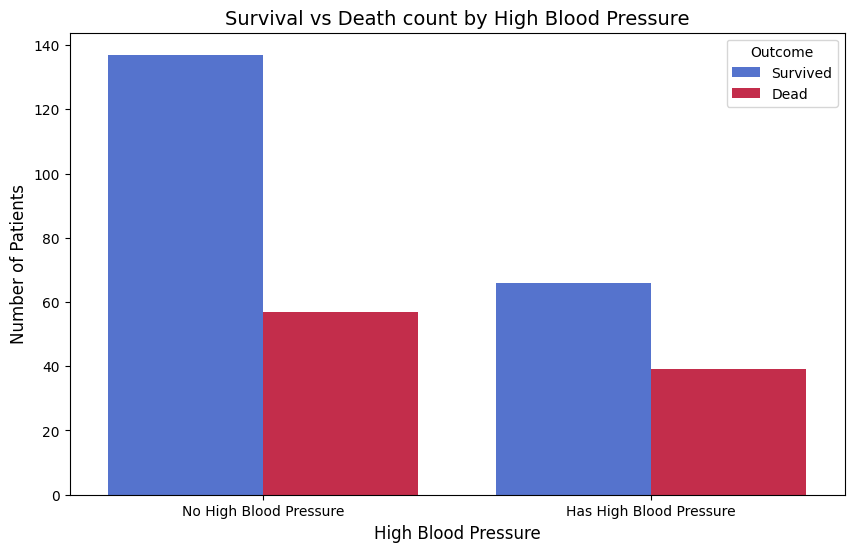

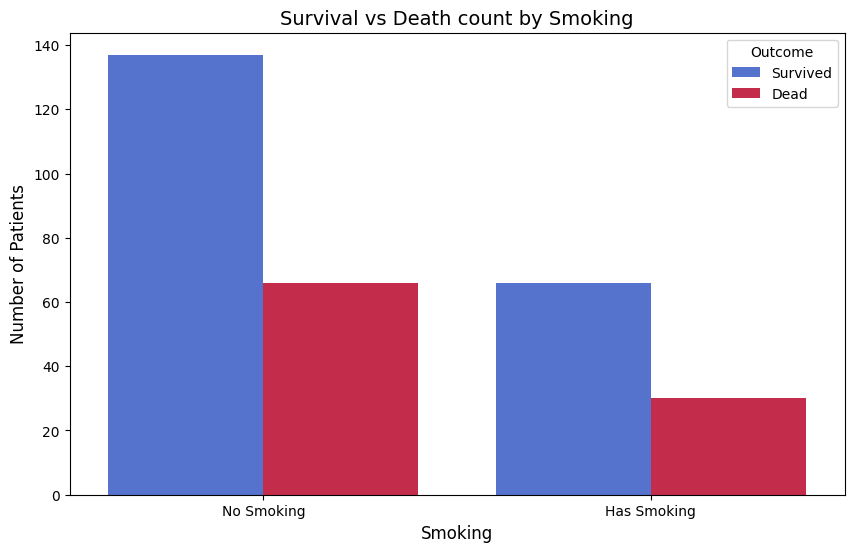

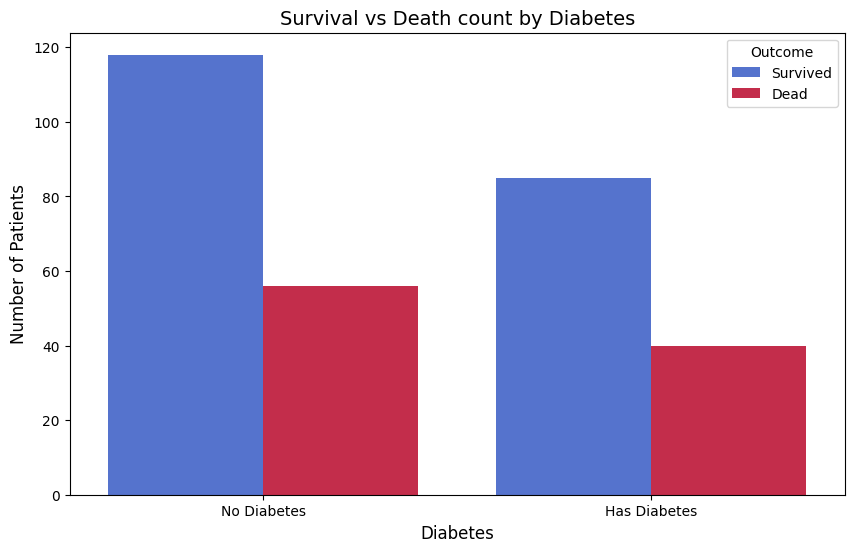

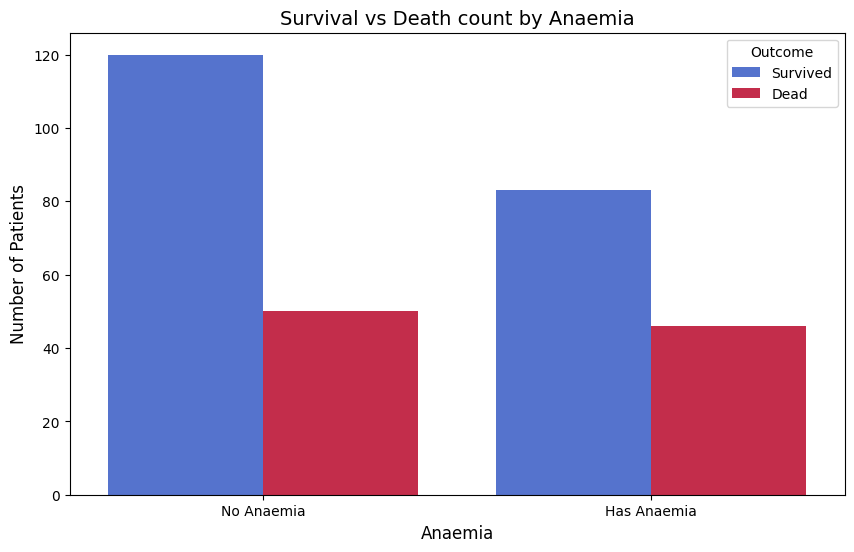

In [6]:
#3. Categorical variables
for col in ['high_blood_pressure', 'smoking', 'diabetes', 'anaemia']:
    plot_categorical_ratio(df, col)

Based on the data, non-smoker patients show a higher number of survivors compared to smoker patients.
same goes with patients with high blood pressure, diabetes and anaemia.

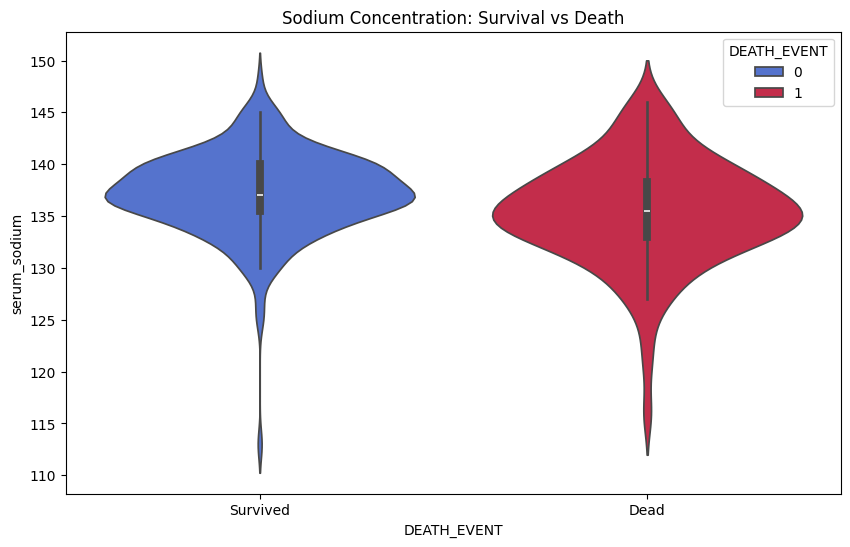

In [7]:
plot_violin_sodium(df)

The bottom "tail" of the Red (Dead) violin is much longer and thinner than the Blue one. This plot reveals that dead patients are prone to extreme Hyponatremia (low sodium levels below 125 mEq/L). Survivors exhibit a much tighter, distribution around the healthy mean of 137 mEq/L.

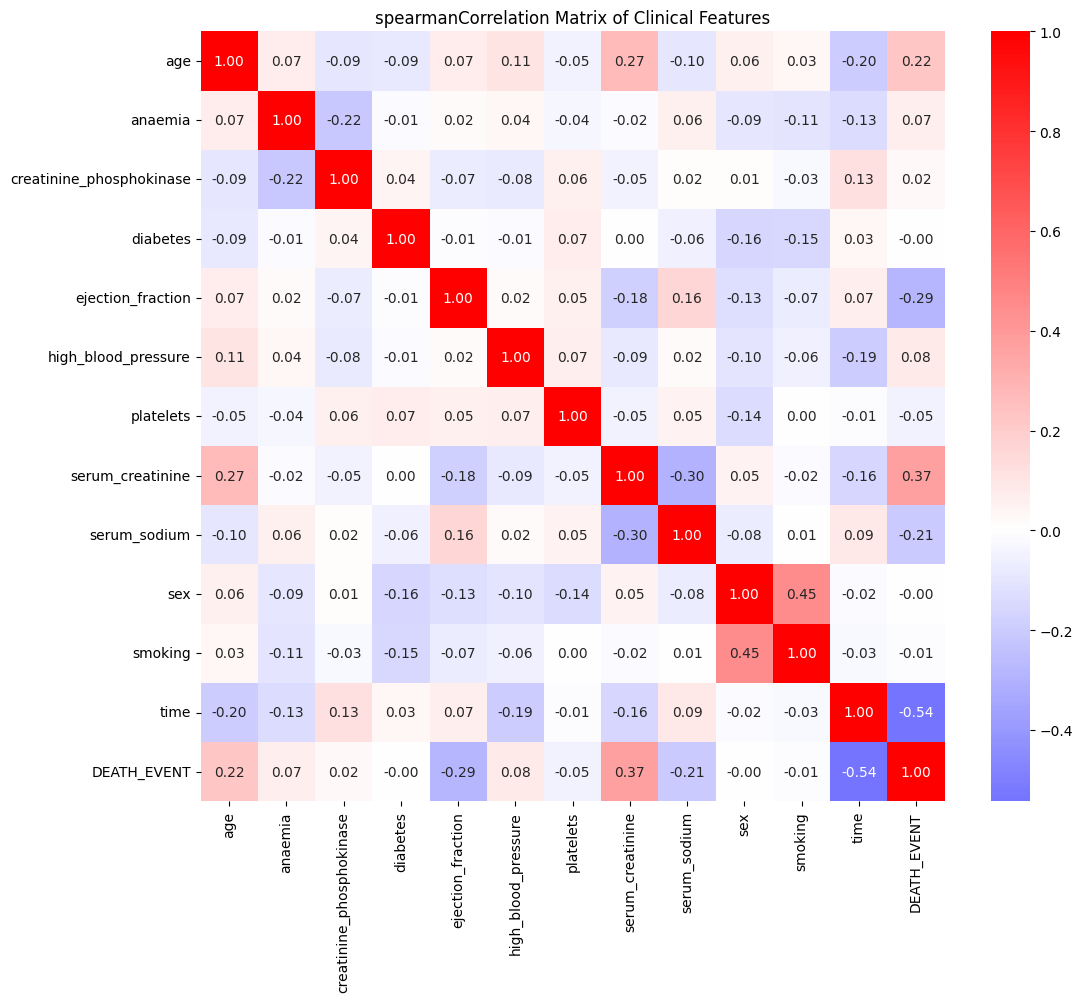

In [8]:
# correlation hitmap
# I will use Spearman because data is skewed and has outliers.
plot_correlation_heatmap(df, 'spearman')

by this, we successfully identified the most important 3 factors of a heart disease, which are:
1. Serum Creatinine - with a strong positive correlation (0.37) 
 --> The kidney-heart link, low Serum Creatinine causes  kidney dysfunction, which strains the heart by causing fluid buildup and hypertension, increasing risks for heart failure.
2. Ejection Fraction - with a strong negative correlation (-0.29) 
 --> heart's main pumping chamber (left ventricle) isn't effectively pumping enough blood out to body = High risk of a heart disease.
3.  Age - with a solid positive correlation (0.22)

Time has strongest negative correlation on heatmap (-0.54), that's because, when as long as time increases, there is less probability that the patient will die, because the time describes the days the patient was observed. Patient either died or when the observation and collecting the data has ended, the patient was still alive. that variable might cause "data leakage", because model might assume that if the time is short, that's because death_event occured, which is not something that can be happen in real world during medical observation.  
"time" variable will be cause of model's very high accuracy, but it will fail on a real world scenario.

In [ ]:
# let's see for Pearson
# plot_correlation_heatmap(df, 'pearson')